In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
dbPath = 'Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{dbPath}")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Explore data in the measurement class
firstRow = session.query(measurement).first()
firstRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f92b8323f10>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
mostRecentDate = session.query(func.max(measurement.date)).first()
mostRecentDate

('2017-08-23',)

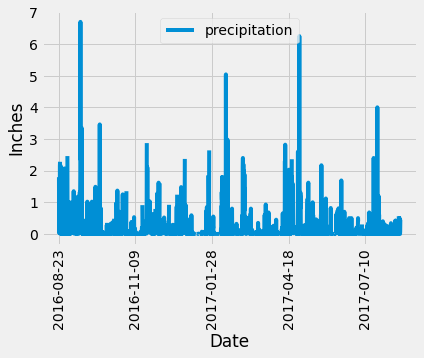

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previousYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores using previousYear
# We are selection the measurement dates and measurement precipitaiton, where the date is greater than last year
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previousYear).all()

# Save the query results (list) as a Pandas DataFrame and set the index to the date column
measurementDF = pd.DataFrame(results, columns=['date', 'precipitation'])
measurementDF.head()

# Sort the dataframe by date
measurementDF = measurementDF.sort_values("date")
measurementDF.head()

# Use Pandas Plotting with Matplotlib to plot the data
measurementDF.plot(x='date', y='precipitation', rot=90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurementDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Explore data in the station class
firstRow = session.query(station).first()
firstRow.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd7e4d50df0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Most active station = 'USC00519281'
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

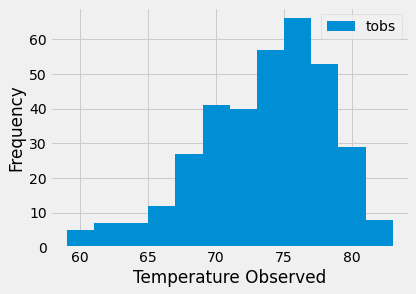

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= previousYear).all()

resultsDF = pd.DataFrame(results, columns=['tobs'])

resultsDF.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature Observed')
plt.show()

# Close session

In [18]:
# Close Session
session.close()